In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data_w_14 = pd.read_excel("crimes_dataset_2014.xlsx")

In [3]:
data_w_14

,State/UT,Rape,Attempt to commit Rape,Kidnapping and Abduction,Dowry Deaths,Assault on Women with intent to outrage her modest,Sexual Harassment,Voyeurism,Insult to the Modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls from Foreign Country,Abetment of Suicides of Women,Indecent Representation of Women,Sati Act,Immoral Traffic
0,Andhra Pradesh,961,165,721,215,4547,1072,71,2649,6362,0,217,3,0,204
1,Arunachal Pradesh,83,10,91,1,121,21,6,3,42,0,0,0,0,0
2,Assam,1980,227,3895,188,3099,458,0,1,9626,1,0,0,0,29
3,Bihar,1127,484,4735,1373,572,271,4,69,4672,5,0,0,0,31
4,Chhattisgarh,1436,21,1393,128,2122,649,9,79,964,0,102,0,0,2
5,Goa,95,2,86,0,202,50,11,57,35,0,0,0,0,9
6,Gujarat,841,6,2187,23,1352,405,7,173,5991,0,164,0,0,45
7,Haryana,1174,136,1922,293,1688,599,26,102,3478,0,120,1,0,43
8,Himachal Pradesh,283,5,227,1,538,159,3,60,325,0,66,0,0,5
9,Jammu & Kashmir,331,20,813,5,1421,242,0,237,467,0,25,0,0,1


In [4]:
data_w_14.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 15 columns):
State/UT                                              39 non-null object
Rape                                                  39 non-null int64
Attempt to commit Rape                                39 non-null int64
Kidnapping and Abduction                              39 non-null int64
Dowry Deaths                                          39 non-null int64
Assault on Women with intent to outrage her modest    39 non-null int64
Sexual Harassment                                     39 non-null int64
Voyeurism                                             39 non-null int64
Insult to the Modesty of Women                        39 non-null int64
Cruelty by Husband or his Relatives                   39 non-null int64
Importation of Girls from Foreign Country             39 non-null int64
Abetment of Suicides of Women                         39 non-null int64
Indecent Representation of Women

# Creating an additional Column of Total Crimes

In [5]:
def get_total_crimes():
    total = []
    for i in range(39):
        total.append(int(sum(data_w_14.iloc[i][1:])))
    return total

In [6]:
total_crimes = pd.DataFrame(data={"State/UT": list(data_w_14["State/UT"].unique()),
                                  "Total Crimes": get_total_crimes()
                                  })

In [7]:
total_crimes.head()

,State/UT,Total Crimes
0,Andhra Pradesh,17187
1,Arunachal Pradesh,378
2,Assam,19504
3,Bihar,13343
4,Chhattisgarh,6905


In [8]:
data = pd.merge(data_w_14,total_crimes,on="State/UT")

In [9]:
data.head()

,State/UT,Rape,Attempt to commit Rape,Kidnapping and Abduction,Dowry Deaths,Assault on Women with intent to outrage her modest,Sexual Harassment,Voyeurism,Insult to the Modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls from Foreign Country,Abetment of Suicides of Women,Indecent Representation of Women,Sati Act,Immoral Traffic,Total Crimes
0,Andhra Pradesh,961,165,721,215,4547,1072,71,2649,6362,0,217,3,0,204,17187
1,Arunachal Pradesh,83,10,91,1,121,21,6,3,42,0,0,0,0,0,378
2,Assam,1980,227,3895,188,3099,458,0,1,9626,1,0,0,0,29,19504
3,Bihar,1127,484,4735,1373,572,271,4,69,4672,5,0,0,0,31,13343
4,Chhattisgarh,1436,21,1393,128,2122,649,9,79,964,0,102,0,0,2,6905


# State with maximum Crimes and Minimum Crimes

In [10]:
temp_data = data.sort_values(by="Total Crimes",ascending=False)
print('Maximum Crimes Occured in ',temp_data.iloc[2]["State/UT"],'(',temp_data.iloc[2]["Total Crimes"],')')
print('Minimum Crimes Occured in ',temp_data.iloc[38]["State/UT"],'(',temp_data.iloc[38]["Total Crimes"],')')

Maximum Crimes Occured in  Uttar Pradesh ( 40778 )
Minimum Crimes Occured in  Lakshadweep ( 4 )


In [11]:
def get_max_crime():
    cols = list(data_w_14.columns)
    max_crimes = []
    for i in range(39):
        max_val = max(data_w_14.iloc[i][1:])
        for col in cols:
            if data_w_14.iloc[i][col] == max_val:
                max_crimes.append(col)
    return max_crimes

In [12]:
max_crimes = pd.DataFrame(data={"State/UT":data_w_14["State/UT"],
                                "Prominent Crime":get_max_crime()})

In [13]:
max_crimes.head()

,State/UT,Prominent Crime
0,Andhra Pradesh,Cruelty by Husband or his Relatives
1,Arunachal Pradesh,Assault on Women with intent to outrage her mo...
2,Assam,Cruelty by Husband or his Relatives
3,Bihar,Kidnapping and Abduction
4,Chhattisgarh,Assault on Women with intent to outrage her mo...


In [14]:
crimes = list(data_w_14.columns)
crimes.remove("State/UT")

In [15]:
crimes_count = {}
for crime in crimes:
    val = len(max_crimes[max_crimes["Prominent Crime"]==crime])
    if val:
        crimes_count[crime] = val

In [16]:
crimes_count

{'Rape': 4,
 'Kidnapping and Abduction': 4,
 'Assault on Women with intent to outrage her modest': 14,
 'Insult to the Modesty of Women': 1,
 'Cruelty by Husband or his Relatives': 15,
 'Immoral Traffic': 1}

In [17]:
crimes_count = pd.DataFrame({'Total Crimes':list(crimes_count.values())},index=list(crimes_count.keys()))
crimes_count.head()

,Total Crimes
Rape,4
Kidnapping and Abduction,4
Assault on Women with intent to outrage her modest,14
Insult to the Modesty of Women,1
Cruelty by Husband or his Relatives,15


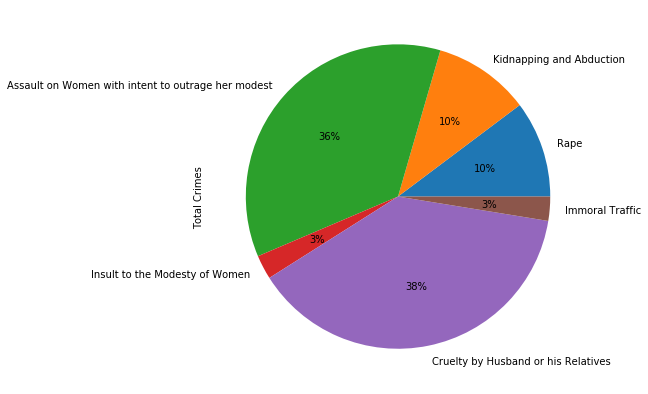

In [18]:
crimes_count.plot.pie(y="Total Crimes",figsize=(7,7),legend=False,autopct='%1.0f%%')

In [19]:
def get_most_proned_state():
    cols = list(data_w_14.columns)[1:]
    most_prones = []
    for col in cols:
        max_val = max(data_w_14.iloc[:36][col])
        most_prones.append(data_w_14[data_w_14[col]==max_val]["State/UT"].iloc[0])
    return most_prones

In [20]:
most_prone = pd.DataFrame(data={"Crime":list(data_w_14.columns)[1:],
                                "Proned State":get_most_proned_state()})

In [21]:
most_prone.head()

,Crime,Proned State
0,Rape,Madhya Pradesh
1,Attempt to commit Rape,West Bengal
2,Kidnapping and Abduction,Uttar Pradesh
3,Dowry Deaths,Uttar Pradesh
4,Assault on Women with intent to outrage her mo...,Maharashtra


In [32]:
proned_count = {}
states = list(data_w_14["State/UT"])
for state in states:
    val = len(most_prone[most_prone["Proned State"]==state])
    if val:
        proned_count[state] = val

In [33]:
proned_count

{'Andhra Pradesh': 2,
 'Bihar': 1,
 'Madhya Pradesh': 1,
 'Maharashtra': 3,
 'Rajasthan': 1,
 'Tamil Nadu': 1,
 'Uttar Pradesh': 3,
 'West Bengal': 2}

In [34]:
proned_count = pd.DataFrame({'Proned States':list(proned_count.values())},index=list(proned_count.keys()))
proned_count

,Proned States
Andhra Pradesh,2
Bihar,1
Madhya Pradesh,1
Maharashtra,3
Rajasthan,1
Tamil Nadu,1
Uttar Pradesh,3
West Bengal,2


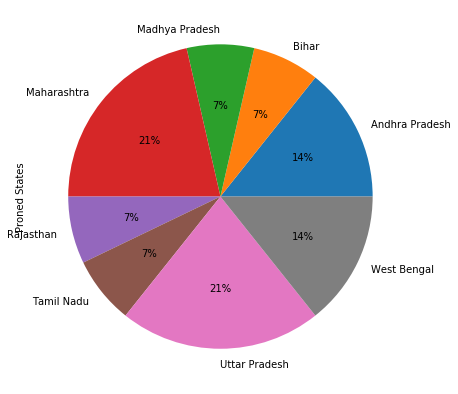

In [25]:
proned_count.plot.pie(y="Proned States",figsize=(7,7),legend=False,autopct='%1.0f%%')

In [26]:
data_w_14

,State/UT,Rape,Attempt to commit Rape,Kidnapping and Abduction,Dowry Deaths,Assault on Women with intent to outrage her modest,Sexual Harassment,Voyeurism,Insult to the Modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls from Foreign Country,Abetment of Suicides of Women,Indecent Representation of Women,Sati Act,Immoral Traffic
0,Andhra Pradesh,961,165,721,215,4547,1072,71,2649,6362,0,217,3,0,204
1,Arunachal Pradesh,83,10,91,1,121,21,6,3,42,0,0,0,0,0
2,Assam,1980,227,3895,188,3099,458,0,1,9626,1,0,0,0,29
3,Bihar,1127,484,4735,1373,572,271,4,69,4672,5,0,0,0,31
4,Chhattisgarh,1436,21,1393,128,2122,649,9,79,964,0,102,0,0,2
5,Goa,95,2,86,0,202,50,11,57,35,0,0,0,0,9
6,Gujarat,841,6,2187,23,1352,405,7,173,5991,0,164,0,0,45
7,Haryana,1174,136,1922,293,1688,599,26,102,3478,0,120,1,0,43
8,Himachal Pradesh,283,5,227,1,538,159,3,60,325,0,66,0,0,5
9,Jammu & Kashmir,331,20,813,5,1421,242,0,237,467,0,25,0,0,1


In [27]:
data_w_14_3  = data_w_14.drop(labels=['Sati Act', 'Indecent Representation of Women', 'Importation of Girls from Foreign Country'], axis=1)

In [28]:
data_w_14_3

,State/UT,Rape,Attempt to commit Rape,Kidnapping and Abduction,Dowry Deaths,Assault on Women with intent to outrage her modest,Sexual Harassment,Voyeurism,Insult to the Modesty of Women,Cruelty by Husband or his Relatives,Abetment of Suicides of Women,Immoral Traffic
0,Andhra Pradesh,961,165,721,215,4547,1072,71,2649,6362,217,204
1,Arunachal Pradesh,83,10,91,1,121,21,6,3,42,0,0
2,Assam,1980,227,3895,188,3099,458,0,1,9626,0,29
3,Bihar,1127,484,4735,1373,572,271,4,69,4672,0,31
4,Chhattisgarh,1436,21,1393,128,2122,649,9,79,964,102,2
5,Goa,95,2,86,0,202,50,11,57,35,0,9
6,Gujarat,841,6,2187,23,1352,405,7,173,5991,164,45
7,Haryana,1174,136,1922,293,1688,599,26,102,3478,120,43
8,Himachal Pradesh,283,5,227,1,538,159,3,60,325,66,5
9,Jammu & Kashmir,331,20,813,5,1421,242,0,237,467,25,1


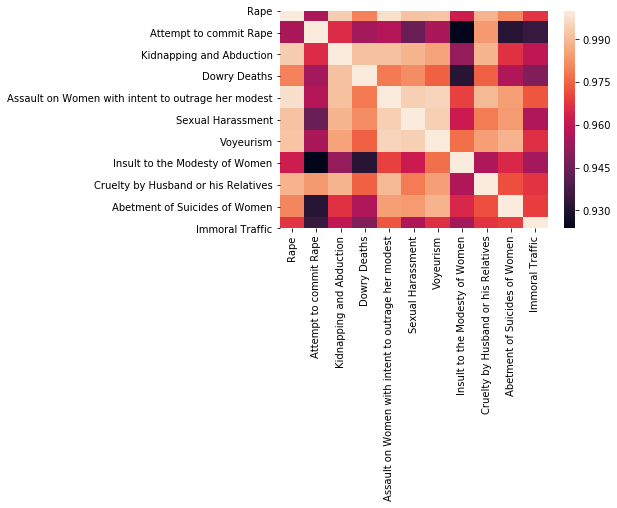

In [29]:
sns.heatmap(data_w_14_3.corr())

In [30]:
data_w_14_3

,State/UT,Rape,Attempt to commit Rape,Kidnapping and Abduction,Dowry Deaths,Assault on Women with intent to outrage her modest,Sexual Harassment,Voyeurism,Insult to the Modesty of Women,Cruelty by Husband or his Relatives,Abetment of Suicides of Women,Immoral Traffic
0,Andhra Pradesh,961,165,721,215,4547,1072,71,2649,6362,217,204
1,Arunachal Pradesh,83,10,91,1,121,21,6,3,42,0,0
2,Assam,1980,227,3895,188,3099,458,0,1,9626,0,29
3,Bihar,1127,484,4735,1373,572,271,4,69,4672,0,31
4,Chhattisgarh,1436,21,1393,128,2122,649,9,79,964,102,2
5,Goa,95,2,86,0,202,50,11,57,35,0,9
6,Gujarat,841,6,2187,23,1352,405,7,173,5991,164,45
7,Haryana,1174,136,1922,293,1688,599,26,102,3478,120,43
8,Himachal Pradesh,283,5,227,1,538,159,3,60,325,66,5
9,Jammu & Kashmir,331,20,813,5,1421,242,0,237,467,25,1


In [31]:
data_w_14_3.to_csv('new_dataset.csv')